<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#question-from-assignment-2022" data-toc-modified-id="question-from-assignment-2022-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>question from assignment 2022</a></span></li><li><span><a href="#question-3" data-toc-modified-id="question-3-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>question 3</a></span></li><li><span><a href="#question-4" data-toc-modified-id="question-4-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>question 4</a></span><ul class="toc-item"><li><span><a href="#plot-the-diagram-using-the-code-below:" data-toc-modified-id="plot-the-diagram-using-the-code-below:-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>plot the diagram using the code below:</a></span></li></ul></li></ul></div>

## question from assignment 2022

A frictionless piston–cylinder device contains 5 kg of nitrogen at 100 kPa and 250 K. Nitrogen is now compressed
slowly according to the relation PV$^{1.4}$ = constant until it reaches a final temperature of 450 K. Calculate the work input
during this process.

In [4]:
#Define variables

m = 5  #kg of nitrogen
T1 = 250  # in K
T2 = 450  # in K 
n = 1.4  # dimensionles **maybe good to include reference for this
R_nitro = 0.2968 ##  kJ/kg.K  

Work input for the process: -742 kJ


Find work out:  (block of text explaining what calculations are being done in the code below, and why)

In [ ]:
W_out = m * R_nitro * (T2 - T1) / (1 - n)
print("Work input for the process: {} kJ".format(round(W_out)))

## question 3
How much energy is required to heat up 1kg of Steam as an ideal gas for 1K at 300K? How about heating up for 2K? Explain upon the assumptions made. 

In [2]:
## Define given inputs

m = 1 # mass of air in kg
T1 = 300 # initial temperature in K
T2 = 301 # final temperature in K

In [6]:
## define fluid properties
C_v =4.184  ## in kJ/(kg.K)

Solution:

(explain the 'game plan' on how to solve the problem, and equations used: $Pv = RT$

In [7]:
## calculate internal energy / start work here ..
## make it standardized for all the students
delta_u = m * C_v * (T2 - T1)
print("Change in internal energy of air at 300 K is: {} kJ".format(delta_u))

Change in internal energy of air at 300 K is: 4.184 kJ


In [7]:
T = 300

In [14]:
U1 = CP.PropsSI('U', 'T', T, 'Q', 1, 'Water') ## q = 1 since the question mentiones steam

In [15]:
U2 = CP.PropsSI('U', 'T', T+1, 'Q', 1, 'Water')

In [16]:
print("Change in internal energy:{}".format(U2 - U1))

1356.7612739172764

In [12]:
h1 = CP.PropsSI('U', 'T', T, 'Q', 1, 'Water')
h2= CP.PropsSI('U', 'T', T+1, 'Q', 1, 'Water')

In [13]:
h2 - h1

1356.7612739172764

## question 4

### plot the diagram using the code below:

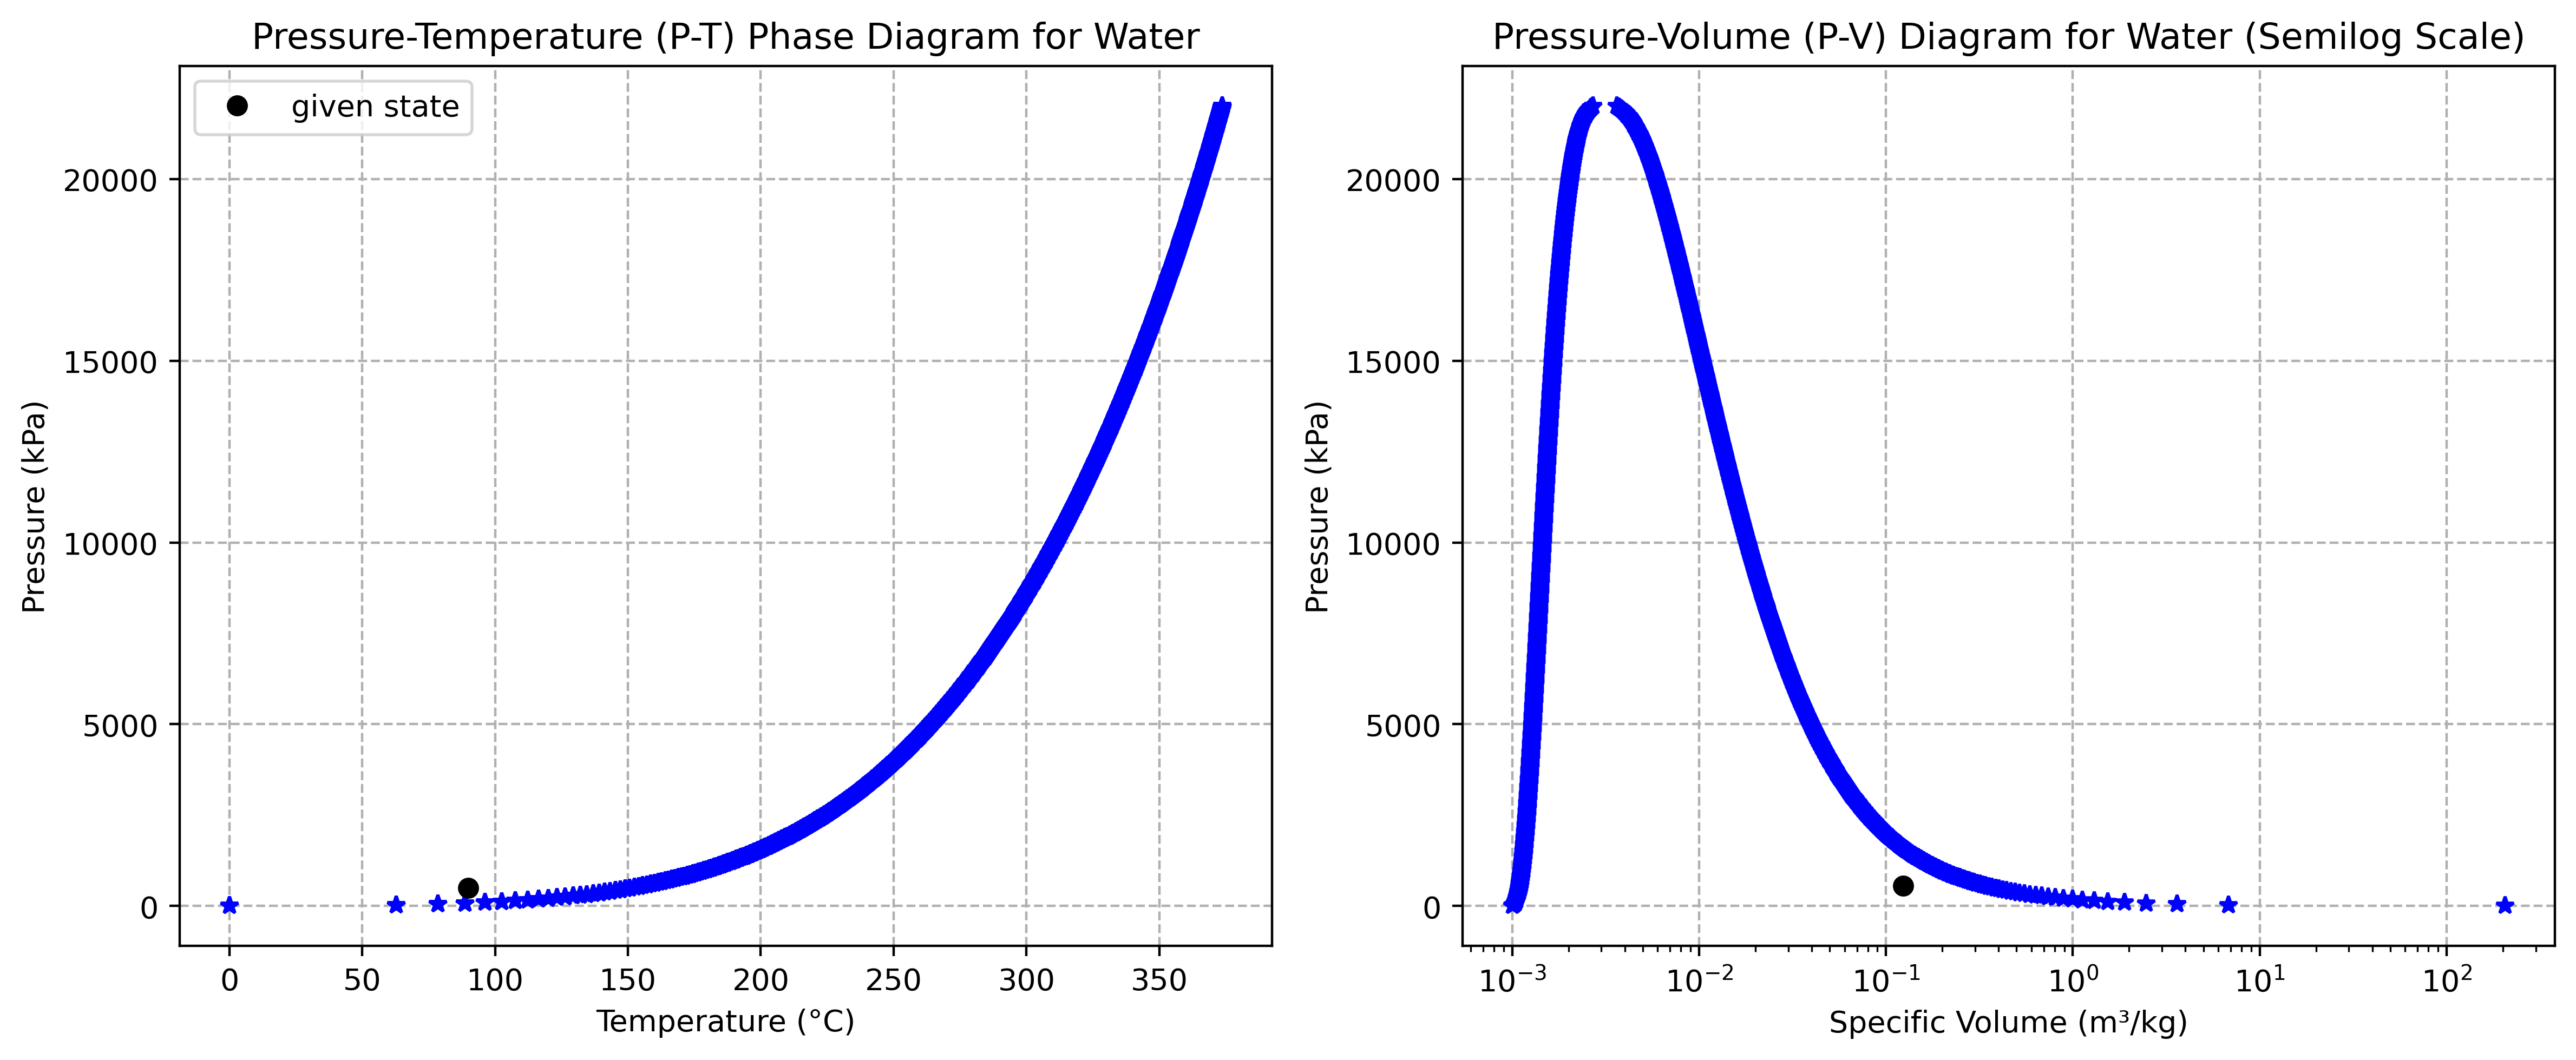

In [27]:
import CoolProp.CoolProp as CP
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import TextBox, Button

# Define the substance and range of temperatures and pressures
substance = 'Water'
T_min = 100  # Minimum temperature in Kelvin (0 degrees Celsius)
T_max = 447.096  # Critical temperature iaan Kelvin
P_min = 611.657  # Saturation pressure at the triple point in Pa
P_max = 220.04e5  # Maximum pressure in Pa

# Create an array of temperatures and pressures
T_vals = np.linspace(T_min, T_max, 100)
P_vals = np.linspace(P_min, P_max, 1000)

# Create a P-T phase diagram
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), dpi=400)

for P in P_vals:
    # Calculate temperature values for the given pressure at saturated liquid and vapor states
    T_liquid = CP.PropsSI('T', 'P', P, 'Q', 0, 'Water')
    T_vapor = CP.PropsSI('T', 'P', P, 'Q', 1, 'Water')

    # Plot the P-T diagram
    ax1.plot([T_liquid - 273.15, T_vapor - 273.15], [P / 1e3, P / 1e3], '*b')

# Set plot attributes for P-T diagram
ax1.set_xlabel('Temperature (°C)')
ax1.set_ylabel('Pressure (kPa)')
ax1.set_title('Pressure-Temperature (P-T) Phase Diagram for Water')
ax1.grid(True, ls='--')

# Define the substance and range of specific volumes and pressures
P_min = 611.657  # Saturation pressure at the triple point in Pa
P_max = 22.004e6  # Maximum pressure in Pa

# Create an array of specific volumes and pressures
#V_vals = np.logspace(np.log10(V_min), np.log10(V_max), 100)
P_vals = np.linspace(P_min, P_max, 1000)

# Create a P-V diagram
for P in P_vals:
    # Calculate specific volume values for the given pressure at saturated liquid and vapor states
    V_liquid = 1 / CP.PropsSI('D', 'P', P, 'Q', 0, 'Water')
    V_vapor = 1 / CP.PropsSI('D', 'P', P, 'Q', 1, 'Water')

    # Plot the P-V diagram
    ax2.semilogx([V_liquid, V_vapor], [P / 1e3, P / 1e3], '*b')

# Set plot attributes for P-V diagram
ax2.set_xlabel('Specific Volume (m³/kg)')
ax2.set_ylabel('Pressure (kPa)')
ax2.set_title('Pressure-Volume (P-V) Diagram for Water (Semilog Scale)')
ax2.grid(True, ls='--')
## add your point here
T1 = 90 ## in deg C
P1 = 500 ## in kPa
ax1.plot(T1, P1,'ok',label = "given state") ## don't need to change this line!
ax1.legend()

## for p-V diagram
v1 = .123456 ## in m3/kg
p1 = 550 ## in kPa
ax2.plot(v1, p1,'ok',label = "given state") ## don't need to change this line!
plt.tight_layout()
plt.show()
